In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Import Dataset
forest=pd.read_csv("forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
# EDA
forest.shape

(517, 31)

In [5]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
forest.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [8]:
data = forest.drop(["month", "day"], axis = 1)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [10]:
data.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [11]:
data.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [12]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
data["size_category"] = le.fit_transform(data["size_category"])
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [14]:
data.size_category.value_counts()

1    378
0    139
Name: size_category, dtype: int64

<Axes: xlabel='size_category', ylabel='Density'>

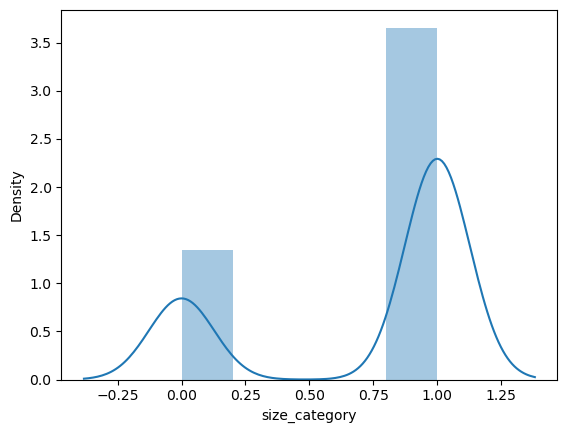

In [15]:
sns.distplot(data.size_category)

In [16]:
# Define X and Y variable
x = data.iloc[:,0:28]
y = data.iloc[:,28]

In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

### StandardScaler

In [18]:
sc = StandardScaler()
x = sc.fit_transform(x)

### Train-Test Split

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

###  ANN

In [20]:
#Initialize ann model
ann = Sequential()

#Add hidden layers
ann.add(Dense(units=6, activation='relu'))

#Add output layer
ann.add(Dense(units=1,activation='sigmoid'))

#Establish the connection between layers
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Fit the data 
ann.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
13/13 [==============================] - 2s 6ms/step - loss: 0.7207 - accuracy: 0.5763
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6987 - accuracy: 0.6005
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.6247
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6632 - accuracy: 0.6489
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6495 - accuracy: 0.6586
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6374 - accuracy: 0.6659
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6261 - accuracy: 0.6852
Epoch 8/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6164 - accuracy: 0.6901
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6070 - accuracy: 0.6973
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5993 - accuracy: 0.7070
Epoch 11/50
13/13 [

In [21]:
ypred = ann.predict(xtest)
ypred=ypred>0.5
ypred


4/4 [==============================] - 0s 4ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.14      0.24        29
           1       0.75      1.00      0.86        75

    accuracy                           0.76       104
   macro avg       0.88      0.57      0.55       104
weighted avg       0.82      0.76      0.69       104



# 1 ] Tuning batch and epoch

In [23]:
# Function to create model,for KerasClassifier
def create_my_model():
    #defining my model
    mymodel = Sequential()
    mymodel.add(Dense(12, input_dim=28, activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return mymodel

In [24]:
# create model
model = KerasClassifier(build_fn=create_my_model)

In [25]:
## Hyperparameter Tunning
batchSize =[10, 20, 40, 60, 80, 100]
epochs = [10, 30, 50,70]

In [26]:
parameter_grid = dict(batch_size=batchSize, epochs=epochs)

In [27]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid=parameter_grid, n_jobs=-1, cv=3)

In [28]:
grid_result=grid.fit(xtrain,ytrain)

Epoch 1/70
42/42 [==============================] - 2s 4ms/step - loss: 0.7686 - accuracy: 0.4262
Epoch 2/70
42/42 [==============================] - 0s 5ms/step - loss: 0.6869 - accuracy: 0.5763
Epoch 3/70
42/42 [==============================] - 0s 4ms/step - loss: 0.6333 - accuracy: 0.6949
Epoch 4/70
42/42 [==============================] - 0s 5ms/step - loss: 0.5954 - accuracy: 0.7409
Epoch 5/70
42/42 [==============================] - 0s 6ms/step - loss: 0.5698 - accuracy: 0.7506
Epoch 6/70
42/42 [==============================] - 0s 5ms/step - loss: 0.5514 - accuracy: 0.7530
Epoch 7/70
42/42 [==============================] - 0s 4ms/step - loss: 0.5384 - accuracy: 0.7506
Epoch 8/70
42/42 [==============================] - 0s 4ms/step - loss: 0.5266 - accuracy: 0.7506
Epoch 9/70
42/42 [==============================] - 0s 4ms/step - loss: 0.5170 - accuracy: 0.7506
Epoch 10/70
42/42 [==============================] - 0s 4ms/step - loss: 0.5073 - accuracy: 0.7530
Epoch 11/70
42/42 [

In [29]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.820851 using {'batch_size': 10, 'epochs': 70}


# 2 ] Optimizing Activation Function

In [30]:
# Function to create model
def create_my_model(optimizer='adam'):
    # create model
    mymodel = Sequential()
    mymodel.add(Dense(12, input_dim=28, activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))
    # Compile model
    mymodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return mymodel

In [31]:
# create model
model = KerasClassifier(build_fn=create_my_model, epochs=70, batch_size=10)

In [32]:
# define the grid search parameters
optimizer = ['SGD','Adadelta', 'RMSprop', 'Adagrad','Adam']
parameter_grid = dict(optimizer=optimizer)

In [33]:
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)

In [34]:
grid_result = grid.fit(xtrain,ytrain)

Epoch 1/70
42/42 [==============================] - 2s 5ms/step - loss: 0.7956 - accuracy: 0.4915
Epoch 2/70
42/42 [==============================] - 0s 4ms/step - loss: 0.7111 - accuracy: 0.5932
Epoch 3/70
42/42 [==============================] - 0s 4ms/step - loss: 0.6557 - accuracy: 0.6804
Epoch 4/70
42/42 [==============================] - 0s 4ms/step - loss: 0.6154 - accuracy: 0.7094
Epoch 5/70
42/42 [==============================] - 0s 3ms/step - loss: 0.5877 - accuracy: 0.7361
Epoch 6/70
42/42 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.7433
Epoch 7/70
42/42 [==============================] - 0s 5ms/step - loss: 0.5510 - accuracy: 0.7554
Epoch 8/70
42/42 [==============================] - 0s 4ms/step - loss: 0.5371 - accuracy: 0.7603
Epoch 9/70
42/42 [==============================] - 0s 4ms/step - loss: 0.5240 - accuracy: 0.7700
Epoch 10/70
42/42 [==============================] - 0s 3ms/step - loss: 0.5115 - accuracy: 0.7700
Epoch 11/70
42/42 [

In [35]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.859533 using {'optimizer': 'Adam'}
